In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the datetime module from the datetime library.
from datetime import datetime
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

591

In [6]:
print (cities)

['butaritari', 'dikson', 'richards bay', 'hilo', 'marcona', 'karakol', 'port hedland', 'port alfred', 'ushuaia', 'vestmannaeyjar', 'kobryn', 'byron bay', 'hobart', 'coahuayana', 'pevek', 'grand river south east', 'airai', 'qasigiannguit', 'bethel', 'pangoa', 'laguna', 'thompson', 'georgetown', 'ornskoldsvik', 'mataura', 'puerto del rosario', 'bredasdorp', 'la ronge', 'luba', 'jamestown', 'bluff', 'hermanus', 'oyama', 'kuznechnoye', 'rungata', 'cape town', 'vila velha', 'talnakh', 'qaanaaq', 'buerarema', 'souillac', 'marzuq', 'sentyabrskiy', 'vardo', 'utica', 'alice springs', 'nisia floresta', 'fortuna', 'kavieng', 'illoqqortoormiut', 'mutsamudu', 'severo-kurilsk', 'huarmey', 'ngara', 'acapulco', 'sao joao da barra', 'sola', 'tromso', 'lieksa', 'barrow', 'poum', 'north platte', 'manyana', 'corinto', 'avarua', 'lufkin', 'kapaa', 'lorengau', 'mpika', 'saint-pierre', 'ahuimanu', 'chuy', 'pili', 'bubaque', 'necochea', 'adrar', 'cidreira', 'bria', 'sorvag', 'el faiyum', 'tolaga bay', 'cherny

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key


In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country})
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | butaritari
Processing Record 2 of Set 1 | dikson
Processing Record 3 of Set 1 | richards bay
Processing Record 4 of Set 1 | hilo
Processing Record 5 of Set 1 | marcona
City not found. Skipping...
Processing Record 6 of Set 1 | karakol
Processing Record 7 of Set 1 | port hedland
Processing Record 8 of Set 1 | port alfred
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | vestmannaeyjar
Processing Record 11 of Set 1 | kobryn
Processing Record 12 of Set 1 | byron bay
Processing Record 13 of Set 1 | hobart
Processing Record 14 of Set 1 | coahuayana
Processing Record 15 of Set 1 | pevek
Processing Record 16 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 17 of Set 1 | airai
Processing Record 18 of Set 1 | qasigiannguit
Processing Record 19 of Set 1 | bethel
Processing Record 20 of Set 1 | pangoa
Processing Record 21 of Set 1 | laguna
Processing Record 22 of Set 1 | thompson
Processing Record 23 of Set 1 | geo

Processing Record 34 of Set 4 | kristiinankaupunki
Processing Record 35 of Set 4 | torbay
Processing Record 36 of Set 4 | sinnamary
Processing Record 37 of Set 4 | douentza
Processing Record 38 of Set 4 | hami
Processing Record 39 of Set 4 | luena
Processing Record 40 of Set 4 | cayenne
Processing Record 41 of Set 4 | bambous virieux
Processing Record 42 of Set 4 | mehamn
Processing Record 43 of Set 4 | tambun
Processing Record 44 of Set 4 | ancud
Processing Record 45 of Set 4 | trofors
Processing Record 46 of Set 4 | carutapera
Processing Record 47 of Set 4 | kahului
Processing Record 48 of Set 4 | sao filipe
Processing Record 49 of Set 4 | nouadhibou
Processing Record 50 of Set 4 | zbarazh
Processing Record 1 of Set 5 | bengkulu
Processing Record 2 of Set 5 | caravelas
Processing Record 3 of Set 5 | ust-kamchatsk
City not found. Skipping...
Processing Record 4 of Set 5 | chokurdakh
Processing Record 5 of Set 5 | porto walter
Processing Record 6 of Set 5 | rio gallegos
Processing Reco

Processing Record 28 of Set 8 | ugoofaaru
Processing Record 29 of Set 8 | tabiauea
City not found. Skipping...
Processing Record 30 of Set 8 | pak chong
Processing Record 31 of Set 8 | knoxville
Processing Record 32 of Set 8 | bondoukou
Processing Record 33 of Set 8 | santiago de chuco
Processing Record 34 of Set 8 | bur gabo
City not found. Skipping...
Processing Record 35 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 36 of Set 8 | sao lourenco do sul
Processing Record 37 of Set 8 | altamira
Processing Record 38 of Set 8 | cedral
Processing Record 39 of Set 8 | pathein
Processing Record 40 of Set 8 | broken hill
Processing Record 41 of Set 8 | bosaso
Processing Record 42 of Set 8 | sivaki
Processing Record 43 of Set 8 | awbari
Processing Record 44 of Set 8 | san patricio
Processing Record 45 of Set 8 | luderitz
Processing Record 46 of Set 8 | kaitangata
Processing Record 47 of Set 8 | calama
Processing Record 48 of Set 8 | ridgecrest
Processing Record 49 of Set 

Processing Record 17 of Set 12 | gisborne
Processing Record 18 of Set 12 | yeppoon
Processing Record 19 of Set 12 | povenets
Processing Record 20 of Set 12 | marabba
Processing Record 21 of Set 12 | sal rei
Processing Record 22 of Set 12 | viisoara
Processing Record 23 of Set 12 | puerto el triunfo
Processing Record 24 of Set 12 | moron
Processing Record 25 of Set 12 | manaure
Processing Record 26 of Set 12 | coihaique
Processing Record 27 of Set 12 | najran
Processing Record 28 of Set 12 | kiama
Processing Record 29 of Set 12 | boa vista
Processing Record 30 of Set 12 | san pedro
Processing Record 31 of Set 12 | flin flon
Processing Record 32 of Set 12 | road town
Processing Record 33 of Set 12 | grand centre
City not found. Skipping...
Processing Record 34 of Set 12 | kropotkin
Processing Record 35 of Set 12 | mae hong son
Processing Record 36 of Set 12 | mocuba
Processing Record 37 of Set 12 | paradwip
City not found. Skipping...
Processing Record 38 of Set 12 | danville
Processing 

In [10]:

len(city_data)

548

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country
0,Butaritari,3.07,172.79,82.08,81,78,19.62,KI
1,Dikson,73.51,80.55,-25.42,84,0,8.10,RU
2,Richards Bay,-28.78,32.04,88.07,55,0,12.15,ZA
3,Hilo,19.73,-155.09,69.80,83,1,3.36,US
4,Karakol,42.49,78.39,24.62,85,11,1.41,KG
5,Port Hedland,-20.32,118.57,95.00,56,1,17.22,AU
6,Port Alfred,-33.59,26.89,71.01,90,17,5.01,ZA
7,Ushuaia,-54.80,-68.30,44.60,93,75,6.93,AR
8,Vestmannaeyjar,63.44,-20.27,28.40,68,20,11.41,IS
9,Kobryn,52.21,24.36,46.40,81,90,15.66,BY


In [12]:
#Re-order columns --City, Country, Date, Lat, Lng, Max Temp, Humidity, Cloudiness, and Wind Speed
new_column_order = ["City", "Country", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed","Date"]
city_data_df = city_data_df[new_column_order]
city_data_df.head()


,City,Country,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Butaritari,KI,3.07,172.79,82.08,81,78,19.62
1,Dikson,RU,73.51,80.55,-25.42,84,0,8.10
2,Richards Bay,ZA,-28.78,32.04,88.07,55,0,12.15
3,Hilo,US,19.73,-155.09,69.80,83,1,3.36
4,Karakol,KG,42.49,78.39,24.62,85,11,1.41


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

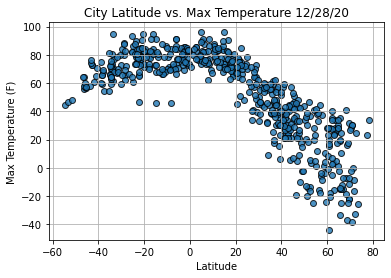

In [15]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

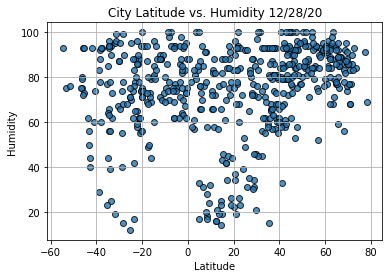

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

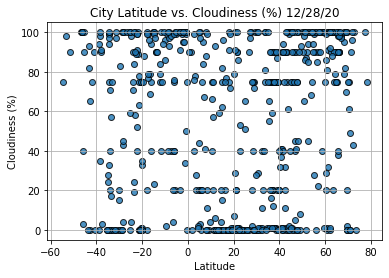

In [17]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

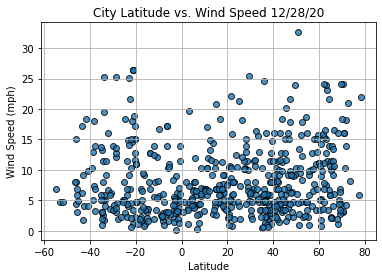

In [18]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [19]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
()    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()
    


IndentationError: unexpected indent (<ipython-input-19-ad23f6d9824c>, line 18)

In [ ]:
index13 = city_data_df.loc[13] 
index13

In [ ]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]


In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,-10))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(20,20))


In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(20,20))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness',
                       '% Cloudiness',(-50,60))

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 
                       'Wind Speed',(40,35))

In [ ]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 
                       'Wind Speed',(-50,20
                                    ))